## Linear Regression and Train/Test Split Challenges

_**Data used:**_ `2013_movies.csv`

### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)

In [173]:
# Import Dependencies
import pandas as pd
from patsy import dmatrices
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import dateutil.parser
from sklearn.cross_validation import train_test_split

# For display
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### <a id='1'></a>Challenge 1:

In [133]:
df = pd.read_csv("../2013_movies.csv")
df["ReleaseDate"] = df["ReleaseDate"].apply(lambda x: dateutil.parser.parse(x))
df["ReleaseDate"] = df["ReleaseDate"].apply(lambda x: x.timetuple().tm_yday)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,326
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,123
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,326
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,184
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,165


In [90]:
y, X = dmatrices('DomesticTotalGross ~ 1', data=df, return_type='dataframe')

In [91]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
model.score(X, y)

0.0

In [93]:
model.coef_

array([[ 0.]])

In [94]:
model.intercept_

array([  1.00596875e+08])

*The result of this model is a horizontal (flat) line at the intercept. This essentially corresponds to predicting the mean, regardless of all other factors.*

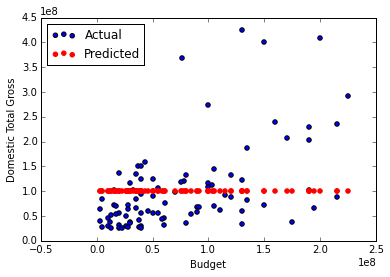

In [95]:
X_for_plot = df["Budget"]

def plot_acutal_vs_predicted_scatter(model, X, y, X_for_plot=X):
    actual = plt.scatter(X_for_plot, y, label="Actual")
    predicted = plt.scatter(X_for_plot, model.predict(X), color="red", label="Predicted")
    plt.legend(handles=[actual, predicted], loc="upper left")
    plt.xlabel('Budget')
    plt.ylabel('Domestic Total Gross')
    plt.show()
    
plot_acutal_vs_predicted_scatter(model, X, y, X_for_plot)

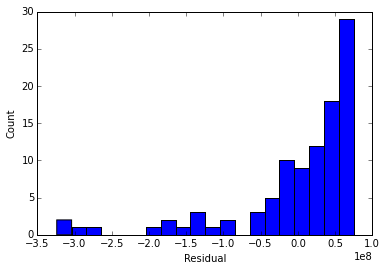

In [96]:
def plot_residuals(model, X, y):
    residuals = model.predict(X) - y
    residual_plot = plt.hist(residuals.values, bins=20)
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    
plot_residuals(model, X, y)

*The residuals are definitely **NOT** normally distributed!*

### <a id='2'></a>Challenge 2:

In [97]:
y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.285813886816
[[ 0.          0.78463743]]
[ 44395595.18320855]


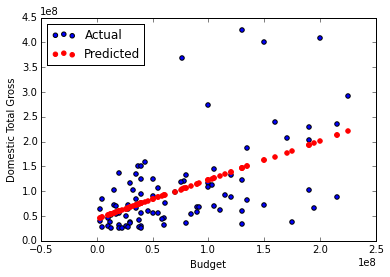

In [105]:
X_for_plot = df["Budget"][df["Budget"].notnull()]
plot_acutal_vs_predicted_scatter(model, X, y, X_for_plot)

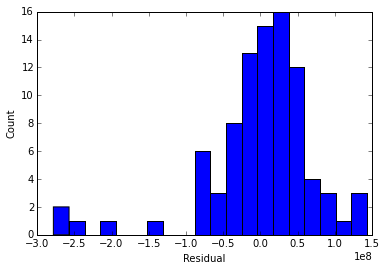

In [100]:
plot_residuals(model, X, y)

*The model is a predicting "starting" gross and adding \~\$0.78 for each additional $1 of budget. The residuals are also now roughly normally distributed.*

### <a id='3'></a>Challenge 3:

In [106]:
y, X = dmatrices('DomesticTotalGross ~ Rating', data=df, return_type='dataframe')
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.109229312116
[[  0.00000000e+00  -1.37357048e+08  -1.57042995e+08  -1.98600335e+08]]
[  2.68492764e+08]


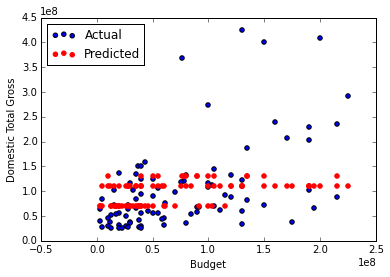

In [111]:
X_for_plot = df["Budget"]
plot_acutal_vs_predicted_scatter(model, X, y, X_for_plot)

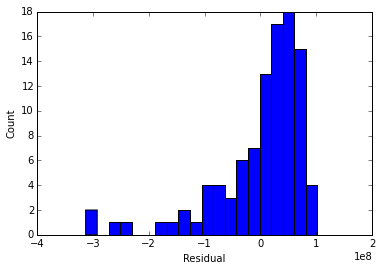

In [109]:
plot_residuals(model, X, y)

*The model is now predicting a different "mean" for each movie rating level (PG, PG-13, R). The results fit the model better than the original Challenge 1 line, and the residuals are somewhat more normally distributed, but ultimately the challenge 2 model is a better fit.*

### <a id='4'></a>Challenge 4:

In [152]:
y, X = dmatrices('DomesticTotalGross ~ Budget + Runtime + Rating + ReleaseDate', data=df, return_type='dataframe')
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.302584219024
[[  0.00000000e+00   1.69045562e+07  -9.75336334e+06  -7.15119276e+06
    7.12688513e-01   5.65085769e+05   2.02889011e+04]]
[-13551123.52587777]


In [153]:
sm_model = sm.OLS(y, X)
sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.202
Date:                Sun, 11 Oct 2015   Prob (F-statistic):           1.21e-05
Time:                        15:09:38   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3486.
Df Residuals:                      83   BIC:                             3501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.016e+07   4.08e+07     -0.249      0.804     -9.13e+07  7.09e+07
Rating[T.PG]     1.352e+07   1.79e+07      0.757      0.451      -2.2e+07   4.9e+07
Rating[T.PG-13] -1.314e+07      2e+07     -0.659      0.512     -5.28e+07  2.65e+07
Rating[T.R]     -1.054e+07   2.05e+07     -0.514      0.609     -5.13e+07  3.03e+07
Budget              0.7127      0.170      4.183      0.000         0.374     1.052
Runtime          5.651e+05   5.53e+05      1.022      0.310     -5.34e+05  1.66e+06
ReleaseDate      2.029e+04   8.29e+04      0.245      0.807     -1.45e+05  1.85e+05
==============================================================================
Omnibus:                       36.123   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.526
Skew:                           1.498   Prob(JB):                     5.38e-18
Kurtosis:                       6.531   Cond. No.                     1.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

*The model here has slightly better R-Squared than with just budget, but we can tell this is based on overfitting because the Adjusted R-Squared is lower and none of the other features are statistically significant.*

In [155]:
y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.285813886816
[[ 0.          0.78463743]]
[ 44395595.18320855]


In [157]:
sm_model = sm.OLS(y, X)
sm_results = sm_model.fit()
sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 11 Oct 2015   Prob (F-statistic):           6.80e-08
Time:                        15:12:37   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Ultimately, just having budget as the only feature is the best model with this data.*

### <a id='5'></a>Challenge 5:

In [159]:
y, X = dmatrices('DomesticTotalGross ~ Budget', data=df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.282768702313
[[ 0.          0.74268988]]
[ 51624332.95834492]


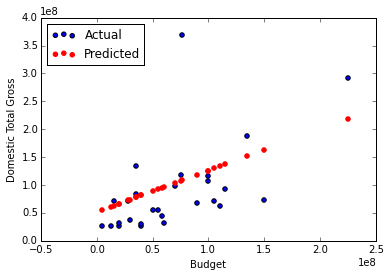

In [162]:
X_for_plot = X_test["Budget"]
plot_acutal_vs_predicted_scatter(model, X_test, y_test, X_for_plot)

*The model does okay, but perhaps predicts a little high on average.*